In [1]:
from itertools import product

from pyprojroot import here

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
VSD_TEST_RESULTS_ROOT = here().joinpath('results/VSD/test_results')

In [3]:
test_csv_paths = sorted(VSD_TEST_RESULTS_ROOT.glob('**/*test_results.csv'))

In [4]:
dfs = []
for test_csv_path in test_csv_paths:
    df = pd.read_csv(test_csv_path)
    if 'detect' in str(test_csv_path):
        df['mode'] = 'detect'
    else:
        df['mode'] = 'classify'
    dfs.append(df)

all_test_results_df = pd.concat(dfs)

/home/bart/anaconda3/envs/searchnets-torch1.3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


In [5]:
all_test_results_df.head()

,acc,acc_largest,acc_random,f1,loss_func,method,mode,net_name,replicate,restore_path
0,NaN,0.208218,0.234116,0.007676,BCE,initialize,classify,CORnet_S,1,/home/bart/Documents/repos/L2M/visual-search-n...
1,NaN,0.208218,0.225483,0.002169,BCE,initialize,classify,CORnet_S,2,/home/bart/Documents/repos/L2M/visual-search-n...
2,NaN,0.208218,0.233425,0.002204,BCE,initialize,classify,CORnet_S,3,/home/bart/Documents/repos/L2M/visual-search-n...
3,NaN,0.208218,0.235843,0.002848,BCE,initialize,classify,CORnet_S,4,/home/bart/Documents/repos/L2M/visual-search-n...
4,NaN,0.208218,0.226865,0.009859,BCE,initialize,classify,CORnet_S,5,/home/bart/Documents/repos/L2M/visual-search-n...


"melt" so that metrics are rows instead of columns, makes plotting more convenient

In [ ]:
value_vars = ['acc_largest', 'acc_random', 'f1']
id_vars = [id_var 
           for id_var in all_test_results_df.columns.tolist() 
           if id_var not in value_vars]
var_name = 'metric_name'
value_name = 'metric_val'
test_df = pd.melt(all_test_results_df, id_vars=id_vars, value_vars=value_vars, var_name=var_name, value_name=value_name)

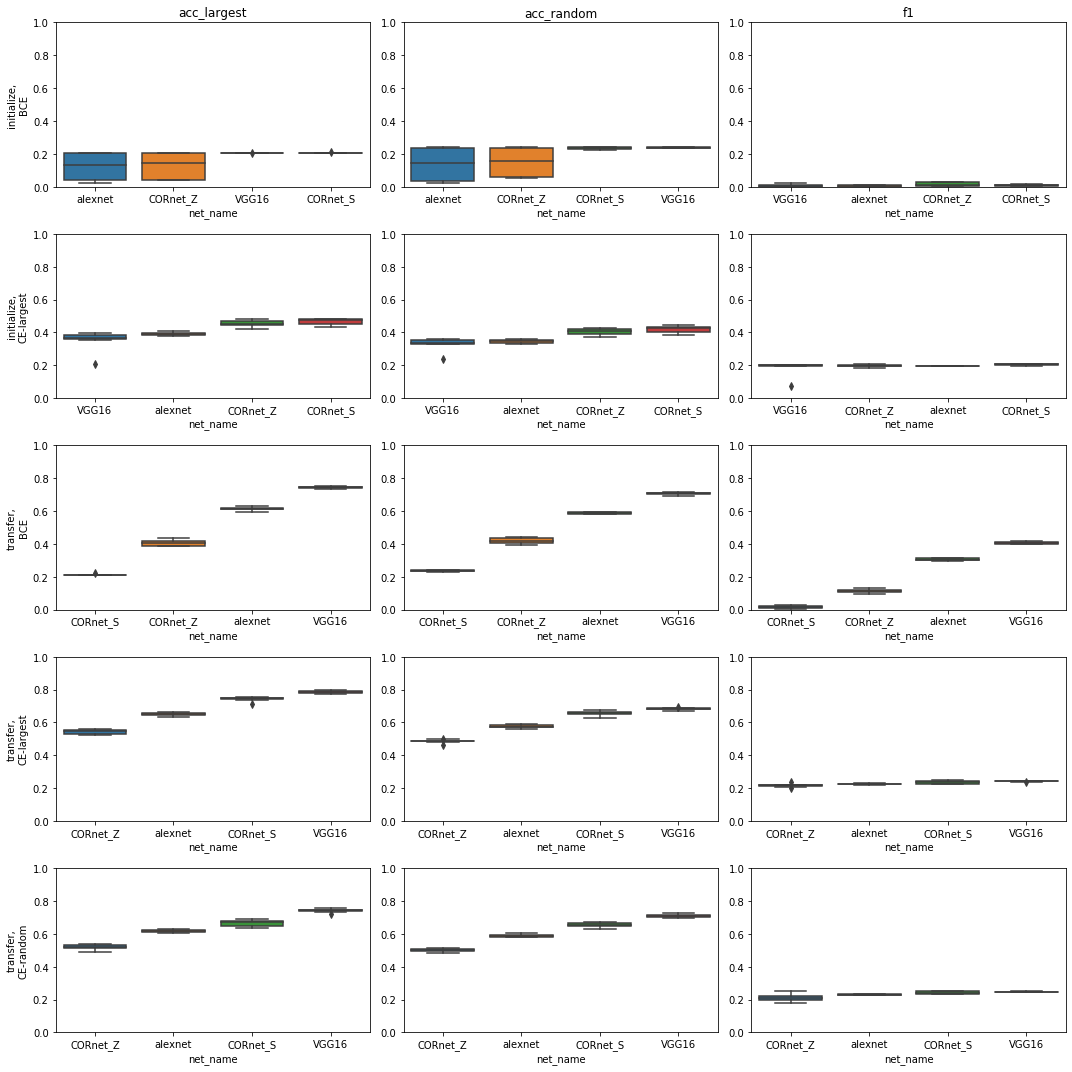

In [66]:
methods = all_test_results_df['method'].unique().tolist()
loss_funcs = all_test_results_df['loss_func'].unique().tolist()

rows_tmp = list(product(methods, loss_funcs))
rows = []
for row in rows_tmp:
    tmp_df = all_test_results_df[
        (all_test_results_df['method'] == row[0]) & (all_test_results_df['loss_func'] == row[1])
    ]
    if len(tmp_df) > 0:
        rows.append(row)

n_rows = len(rows)

columns = ['acc_largest', 'acc_random', 'f1']
n_cols = len(columns)

fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 15))
for row_ind, row in enumerate(rows):
    method, loss_func = row[0], row[1]
    row_df = all_test_results_df[(all_test_results_df['method'] == method) & (all_test_results_df['loss_func'] == loss_func)]
    for col_ind, metric in enumerate(columns):
        row_df_sorted = row_df.sort_values(by=metric)
        sns.boxplot(x='net_name', y=metric, data=row_df_sorted, ax = ax[row_ind, col_ind])
        ax[row_ind, col_ind].set_ylim([0, 1])
        if row_ind == 0:
            ax[row_ind, col_ind].set_title(metric)
        if col_ind == 0:
            ax[row_ind, col_ind].set_ylabel(f'{method},\n{loss_func}')
        else:
            ax[row_ind, col_ind].set_ylabel('')

fig.tight_layout()